### Steps for Gradient Descent for Linear Regression 
- Consider random values of m and b
- Take epochs and learning rate
- Calculate loss_slop with respect to m as well as b


### Partial Derivative with respect to \( b \):
$
\frac{\partial L}{\partial b} = 2 \sum \left( y_i - m x_i - b \right)
$

$
= -2 \sum \left( y_i - m x_i - b \right)
$

$
\text{slope-b at } b=0
$

---

### Partial Derivative with respect to \( m \):
$
\frac{\partial L}{\partial m} = 2 \sum \left( y_i - m x_i - b \right) (-x_i)
$

$
= -2 \sum \left( y_i - m x_i - b \right) x_i
$

$
\text{slope-m at } m=1
$


- note : I have taken mean squared as loss function for this exercise

In [39]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [40]:
X,y  = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=80, random_state=12)

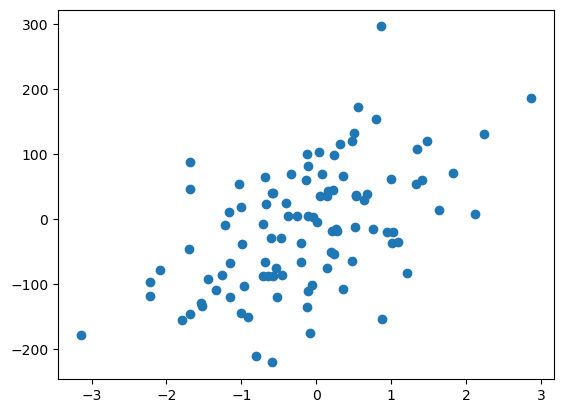

In [41]:
plt.scatter(X,y)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [44]:
print(lr.coef_)
print(lr.intercept_)

[48.97417894]
-4.578189331523953


In [45]:
np.mean(cross_val_score(lr, X_train,y_train,scoring='r2',cv=10))

-0.3415906861883121

In [46]:
y_pred = lr.predict(X_test)

In [47]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.3611487221844938

In [48]:
class GDRegressor:

    def __init__(self, learning_rate, epochs):
        self.m = 100
        self.b = -100
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X,y):
        # calculate the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y-self.m*X.ravel()-self.b)
            loss_slope_m = -2 * np.sum((y-self.m*X.ravel()-self.b) * X.ravel())

            self.b = self.b - (self.learning_rate * loss_slope_b)
            self.m = self.m - (self.learning_rate * loss_slope_m)

        print(self.m, self.b)

    def predict(self, X):

        return self.m * X + self.b


In [49]:
gd = GDRegressor(0.001, 45)
gd.fit(X_train,y_train)

48.94826621089751 -4.617995478528748


In [50]:
y_pred = gd.predict(X_test)

from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.3612670197979244

In [52]:
#  plotting it 



b = -120
m = 100
lr = 0.001
all_b = []
all_m = []
all_cost = []

epochs = 45

for i in range(epochs):
    slope_b = 0
    slope_m = 0
    cost = 0
    for j in range(X.shape[0]):
        slope_b = slope_b - 2*(y[j] - (m * X[j]) -  b)
        slope_m = slope_m - 2*(y[j] - (m * X[j]) -  b)*X[j]
        cost = cost + (y[j] - m * X[j] -b) ** 2

    b = b - (lr * slope_b)
    m = m - (lr * slope_m)
    all_b.append(b)
    all_m.append(m)
    all_cost.append(cost)

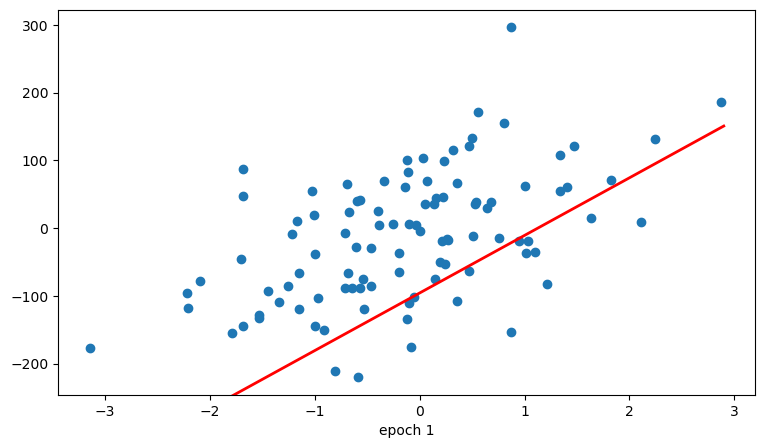

In [57]:
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*(-27) -150
ax.scatter(X, y)
line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*all_m[i] + all_b[i])
    ax.set_xlabel(label)

anim = FuncAnimation(fig, update, repeat=True, frames=epochs, interval=500)

f = r"ani.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)